In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import stats
from functools import partial

In [2]:
# Set parameters
a,b,c = 0.1,1.5,-2.0

In [3]:
# Load all data
τ2_rejection_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection.dat"%(a,b,c))
τ2_direct_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_direct.dat"%(a,b,c))

In [4]:
# Get total number of samples in data
num_samples_data = τ2_rejection_full_data.shape[0]
print("There are a total of %d samples in the full data set."%num_samples_data)

There are a total of 1000000 samples in the full data set.


In [5]:
# Set start index (i.e, how many samples will be thrownaway due to equilibration)
equil_percent = 0.2
start = int(num_samples_data*equil_percent)

print("The %d first samples will be thrown away for equilibration."%start)

The 200000 first samples will be thrown away for equilibration.


In [6]:
# Set number of desired samples to use
num_samples = num_samples_data-start

print("There are a total of %d samples left in the data set after equilibration."%(num_samples))

There are a total of 800000 samples left in the data set after equilibration.


In [7]:
τ2_rejection = τ2_rejection_full_data[start:]
τ2_direct = τ2_direct_full_data[start:]

In [8]:
def P(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return (1/Z)*np.exp(c*(τ-a));

def cdf(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return (np.exp(c*(τ-a))-1)/(c*Z)

def P_times_tau(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return τ*(1/Z)*np.exp(c*(τ-a));

In [9]:
cdf_fixed = partial(cdf,a=a,b=b,c=c)

In [10]:
τ_fit = np.linspace(a,b,1000)

### Compute average time from exact and sampled distributions

In [11]:
# Compute "exact" average of time
τ_mean_exact = integrate.quad(P_times_tau,a,b,args=(a,b,c))
print("Average time (exact): ",τ_mean_exact)

Average time (exact):  (0.5093537054780725, 5.654962114998968e-15)


In [12]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_rejection,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_rejection = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with rejection: ",τ_mean_rejection)

Average sampled time with rejection:  0.5082187425969835


In [13]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_direct,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_direct = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with direct: ",np.sum(τ2_probs*τ2_edges[:-1]))

Average sampled time with direct:  0.5079243385958052


In [14]:
rejection_error = np.abs((τ_mean_exact - τ_mean_rejection) / τ_mean_exact)[0]
direct_error = np.abs((τ_mean_exact - τ_mean_direct) / τ_mean_exact)[0]

print("Rejection Error: %.6f"%(rejection_error))
print("Direct Error: %.6f"%(direct_error))

Rejection Error: 0.002228
Direct Error: 0.002806


### Rejection vs Direct sampling $\tau$ from simple exponential distribution

In [15]:
colors = ['salmon','dodgerblue','mediumseagreen','darkorange','dimgrey']
colors = ['#FFA0A0','#1e90ff','#3cb371','darkorange','dimgrey']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE','navajowhite','lightgrey']

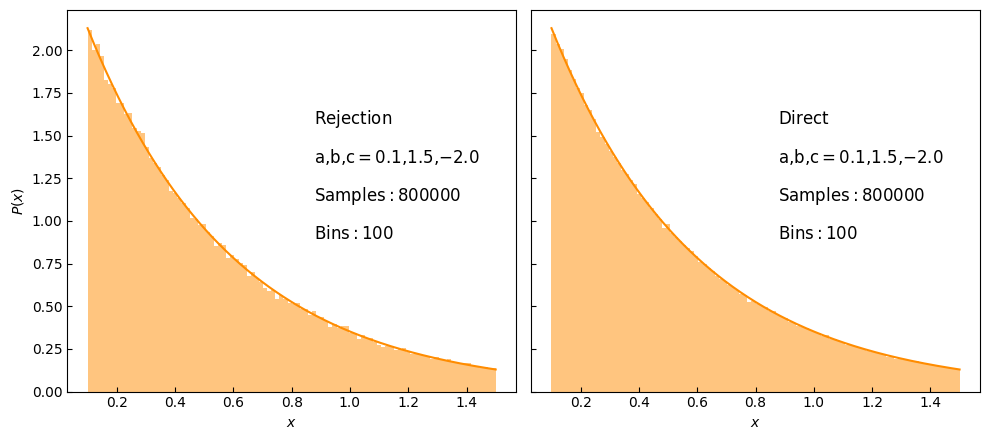

In [17]:
# with plt.style.context('../IOP_large.mplstyle'):

fig,ax = plt.subplots(1,2,figsize=(10,4.5), dpi=100,sharey=True,tight_layout=True);
plt.subplots_adjust(wspace=0.02);

num_bins = 100

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

ax[0].plot(τ_fit,P(τ_fit,a,b,c),color=colors[3],alpha=1.0)
ax[0].hist(τ2_rejection, density=True, bins=num_bins,label=r'$\rm{Rejection}$',color=colors[3],alpha=0.5);  # density=False would make counts
ax[0].set_xlabel(r'$x$');
ax[0].set_ylabel(r'$P(x)$');
ax[0].tick_params(direction='in')
ax[0].annotate(r"$\rm{Rejection}$",(0.55,0.70),
                xycoords='axes fraction',fontsize=12)
ax[0].annotate(r"$\rm{a}$,$\rm{b}$,$\rm{c} = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.55,0.60),
                xycoords='axes fraction',fontsize=12)
ax[0].annotate(r"$\rm{Samples: %d}$"%num_samples,(0.55,0.50),
                xycoords='axes fraction',fontsize=12)
ax[0].annotate(r"$\rm{Bins: %d}$"%num_bins,(0.55,0.40),
                xycoords='axes fraction',fontsize=12)

ax[1].plot(τ_fit,P(τ_fit,a,b,c),color=colors[3],alpha=1.0)
ax[1].hist(τ2_direct, density=True, bins=num_bins,label=r'$\rm{Direct}$',color=colors[3],alpha=0.5);  # density=False would make counts
ax[1].set_xlabel(r'$x$');
# ax[1].legend(frameon=False);
ax[1].tick_params(direction='in')
ax[1].annotate(r"$\rm{Direct}$",(0.55,0.70),
                xycoords='axes fraction',fontsize=12);
ax[1].annotate(r"$\rm{a}$,$\rm{b}$,$\rm{c} = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.55,0.60),
                xycoords='axes fraction',fontsize=12)
ax[1].annotate(r"$\rm{Samples: %d}$"%num_samples,(0.55,0.50),
                xycoords='axes fraction',fontsize=12)
ax[1].annotate(r"$\rm{Bins: %d}$"%num_bins,(0.55,0.40),
                xycoords='axes fraction',fontsize=12)

# Adjust vertical space between subplots
# fig.subplots_adjust(hspace=0.023)
# fig.subplots_adjust(hspace=0.0003)

plt.savefig("../figures/simple_truncexpon_histogram_benchmark.pdf",dpi=300)

plt.show()

In [18]:
# Check normalization
integrate.quad(P,a,b,args=(a,b,c))

(0.9999999999999998, 1.1102230246251562e-14)

In [19]:
# Compute kstest as a function of sample number
num_samples_rejection = 100000
num_samples_direct = 100000

In [20]:
pvalues_rejection = np.zeros(num_samples_rejection)
pvalues_direct = np.zeros(num_samples_direct)

In [21]:
ksvalues_rejection = np.zeros(num_samples_rejection)
ksvalues_direct = np.zeros(num_samples_direct)

In [22]:
%%time
for i in range(num_samples_rejection):
    if i%10000==0: print("%d/%d"%(i,num_samples_rejection))
    
    ksvalues_rejection[i],pvalues_rejection[i] = stats.kstest(τ2_rejection[:i+1],cdf_fixed)

    ksvalues_direct[i],pvalues_direct[i] = stats.kstest(τ2_direct[:i+1],cdf_fixed)
    

0/100000
10000/100000
20000/100000
30000/100000
40000/100000
50000/100000
60000/100000
70000/100000
80000/100000
90000/100000
CPU times: user 12min 15s, sys: 42.6 ms, total: 12min 15s
Wall time: 12min 16s


In [24]:
stats.kstest(τ2_rejection[:100],cdf_fixed)

KstestResult(statistic=0.39260114216210185, pvalue=2.1164736531609455e-14)

In [28]:
# Write sample number, KS-statistic and p values to file
filename_rejection = "../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection_ksTest.dat"%(a,b,c)
file_rejection = open(filename_rejection,"w")
header = "# ks-value      p-value \n"
file_rejection.write(header)
for i,ks in enumerate(ksvalues_rejection):
    file_rejection.write("%.12f %.12f \n"%(ksvalues_rejection[i],pvalues_rejection[i]))

filename_direct = "../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_direct_ksTest.dat"%(a,b,c)
file_direct = open(filename_direct,"w")
header = "# ks-value      p-value \n"
file_direct.write(header)
for i,ks in enumerate(ksvalues_direct):
    file_direct.write("%.12f %.12f \n"%(ksvalues_direct[i],pvalues_direct[i]))
    
file_rejection.close()
file_direct.close()

In [33]:
ksvalues_rejection = np.loadtxt("../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection_ksTest.dat"%(a,b,c))[:,0]
ksvalues_direct = np.loadtxt("../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_direct_ksTest.dat"%(a,b,c))[:,0] 

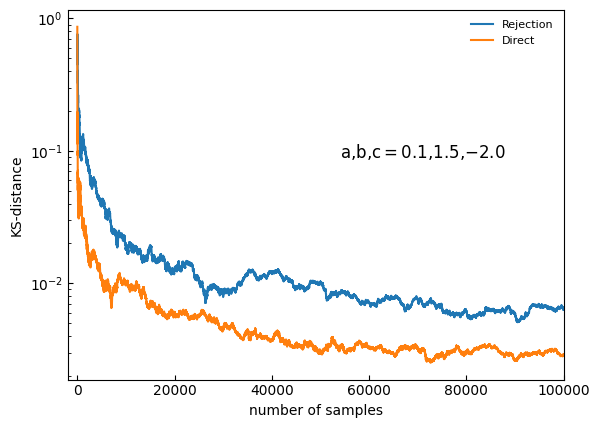

In [36]:
# with plt.style.context('../IOP_large.mplstyle2'):
#     fig,ax = plt.subplots(2,1,figsize=(4.5,4.5), dpi=150,sharey=False,sharex=False,tight_layout=False);
fig,ax = plt.subplots()
#     plt.subplots_adjust(wspace=0.02);
#     plt.subplots_adjust(hspace=0.02);

# ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(range(num_samples_rejection),ksvalues_rejection,label='Rejection')
ax.plot(range(num_samples_direct),ksvalues_direct,label='Direct')
ax.axhline(0.0,color="#aaaaaa",zorder=-10)
ax.set_ylabel("KS-distance")
ax.tick_params(direction='in',which='both')
ax.set_xlim(-2000,100000)
ax.set_xlabel("number of samples")

ax.annotate(r"$\rm{a}$,$\rm{b}$,$\rm{c} = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.55,0.60),
                xycoords='axes fraction',fontsize=12)

#     ax[1].plot(range(num_samples_rejection),pvalues_rejection,label='Rejection')
#     ax[1].plot(range(num_samples_direct),pvalues_direct,label='Direct')
#     ax[1].axhline(1.0,color="#aaaaaa",zorder=-10)
#     ax[1].set_ylabel("p-value")
#     ax[1].tick_params(direction='in')

ax.legend(frameon=False,fontsize=8)

plt.savefig("../figures/%.6f_%.6f_%.6f_simpleTruncexpon_ksTest.pdf"%(a,b,c),dpi=300)